In [1]:
!pip install xgboost

In [2]:
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

boston = load_boston()

x_tr, x_te, y_tr, y_te = train_test_split(
    boston['data'],
    boston['target'],
    random_state=0
)

model = xgb.XGBRegressor(object='reg.linear')
model.fit(x_tr,y_tr)

p_train = model.predict(x_tr)
p_test = model.predict(x_te)

r2_score(y_tr,p_train), r2_score(y_te,p_test)

[13:50:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "object" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




(0.999999003030776, 0.7476326752660457)

#### LightGBM

In [3]:
!pip install lightgbm

In [5]:
import lightgbm as lgb

lgb_train = lgb.Dataset(x_tr,y_tr)
lgb_eval = lgb.Dataset(x_te,y_te,reference=lgb_train)

params = {
    'objective' : 'regression'
}

model = lgb.train(params, lgb_train, valid_sets=lgb_eval,
                 early_stopping_rounds=5)

p_train = model.predict(x_tr,num_iteration=model.best_iteration)
p_test = model.predict(x_te,num_iteration=model.best_iteration)

r2_score(y_tr,p_train), r2_score(y_te,p_test)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 973
[LightGBM] [Info] Number of data points in the train set: 379, number of used features: 13
[LightGBM] [Info] Start training from score 22.608707
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 70.5396
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 61.4369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 53.753
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 47.6561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's l2: 42.6525
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid_0's l2: 

(0.9524522112992748, 0.7369037475494296)

In [8]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
x,y = make_blobs(random_state=10,
                n_samples=100, # samples : 행 개수
                n_features=2, # features : 열 개수
                centers=3) # centers : 중심 갯수(=그룹개수)
# plt.scatter(x[:,0],x[:,1])
x[:5], y[:5]

(array([[-2.32496308, -6.6999964 ],
        [ 0.51856831, -4.90086804],
        [ 2.44301805,  3.84652646],
        [ 5.82662285, -9.92259335],
        [ 2.03300209,  5.28990817]]),
 array([2, 2, 1, 0, 1]))

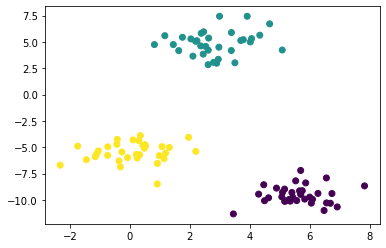

In [9]:
plt.scatter(x[:,0], x[:,1],c=y) # c = color

[[ 2.84050716  4.85840422]
 [ 5.6183469  -9.54288499]
 [ 0.08921213 -5.46441742]]


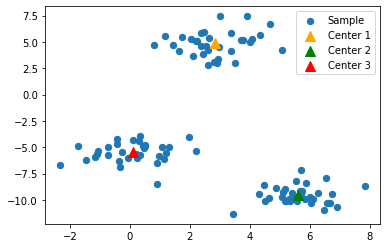

In [12]:
from sklearn.cluster import KMeans
color = ['orange','green','red']

K = KMeans(n_clusters=3).fit(x)
plt.scatter(x[:,0],x[:,1],s=40,label='Sample')

centers = K.cluster_centers_
print(centers)

for idx, center in enumerate(centers) :
    plt.scatter(center[0],center[1],s=100,
               label=f'Center {idx+1}', c=color[idx], marker='^')
plt.legend()
plt.show()

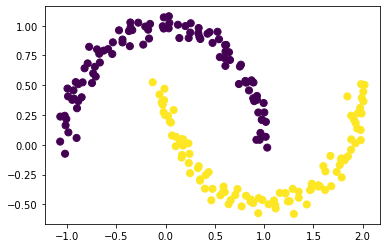

In [13]:
from sklearn.datasets import make_moons
x, y = make_moons(200,noise=.05,random_state=0)
plt.scatter(x[:,0],x[:,1],c=y,s=50)

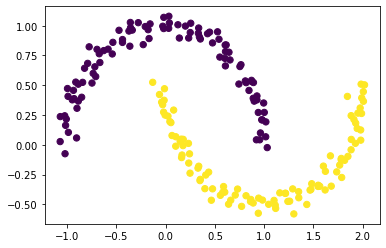

In [14]:
x, y = make_moons(200,noise=.05,random_state=0)

from sklearn.cluster import KMeans
labels = KMeans(n_clusters=2).fit_predict(x)
plt.scatter(x[:,0],x[:,1],c=y,s=40)


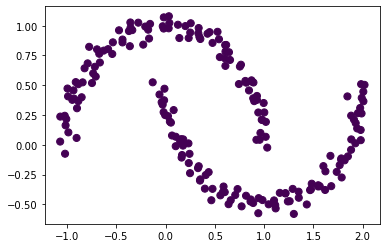

In [15]:
from sklearn.cluster import DBSCAN
labels = DBSCAN().fit_predict(x)
plt.scatter(x[:,0],x[:,1],c=labels, s=50)

In [16]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

#### 손글씨 데이터 k-means와 DBSCAN 모델 사용

In [17]:
# 데이터 세트 준비
from sklearn.datasets import load_digits
digits = load_digits()
digits['data'].shape, digits['target'].shape

((1797, 64), (1797,))